Importar bibliotecas e ler o conjunto de dados

In [83]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

# #Upload dataset
# from google.colab import files
# uploaded = files.upload()

data=pd.read_csv("dataset.csv")
data.head()

tab = pd.DataFrame(data)
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Calcular o IMC

In [84]:
data['IMC'] = data['Weight']/(data['Height']**2)

data = data[['Gender', 'Age', 'Height', 'Weight','IMC','family_history_with_overweight','FAVC','FCVC','NCP','CAEC','SMOKE','CH2O','SCC', 'FAF','TUE','CALC','MTRANS','NObeyesdad']]

data.head()

data.shape
data['IMC']

0       24.386526
1       24.238227
2       23.765432
3       26.851852
4       28.342381
          ...    
2106    44.901475
2107    43.741923
2108    43.543817
2109    44.071535
2110    44.144338
Name: IMC, Length: 2111, dtype: float64

 Descartar duplicatas

In [85]:
dup_data = data[data.duplicated()]
print(dup_data.shape)

df = data.drop_duplicates(keep='last')
df.shape

(24, 18)


(2087, 18)

 Termine de preparar o conjunto de dados

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   IMC                             2087 non-null   float64
 5   family_history_with_overweight  2087 non-null   object 
 6   FAVC                            2087 non-null   object 
 7   FCVC                            2087 non-null   float64
 8   NCP                             2087 non-null   float64
 9   CAEC                            2087 non-null   object 
 10  SMOKE                           2087 non-null   object 
 11  CH2O                            2087 non-null   float64
 12  SCC                             20

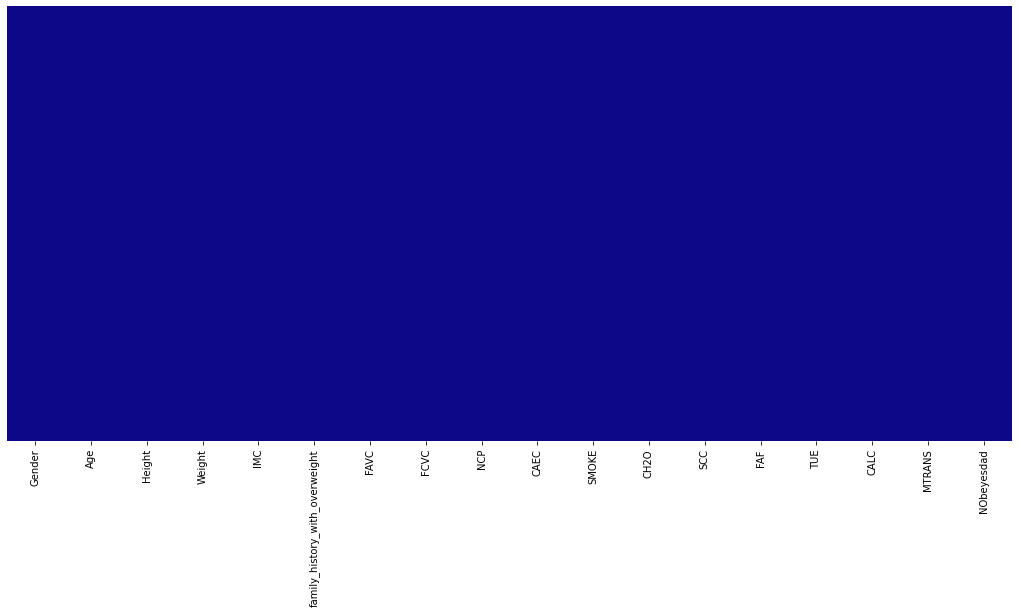

In [86]:
sn.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='plasma')

df.info()

Análise em gráfico

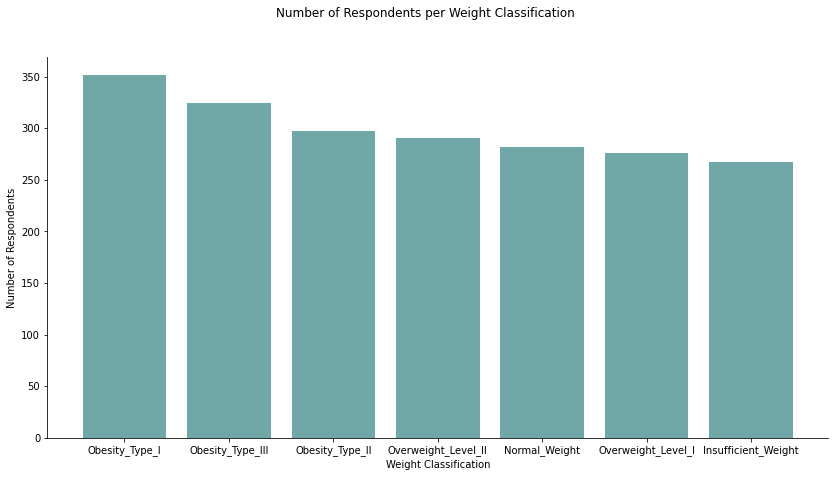

In [87]:
fig = plt.figure(figsize = (14, 7))
fig.suptitle("Number of Respondents per Weight Classification")

counts = df["NObeyesdad"].value_counts()
plt.bar(counts.index, counts.values, color="#6fa8a7")
plt.xlabel("Weight Classification")
plt.ylabel("Number of Respondents")
plt.show()

Definindo como obeso IMC > 29

In [88]:
data['is_obeyesdad'] = [ 
    1 if imc > 29 else 0 for imc in data['IMC'] 
] 

data.head()

,Gender,Age,Height,Weight,IMC,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,is_obeyesdad
0,Female,21.0,1.62,64.0,24.386526,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,0
1,Female,21.0,1.52,56.0,24.238227,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,0
2,Male,23.0,1.80,77.0,23.765432,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0
3,Male,27.0,1.80,87.0,26.851852,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,0
4,Male,22.0,1.78,89.8,28.342381,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0


Genero 1 para masculino e 0 para femenino

In [89]:
data['gender'] = [ 
    1 if gender == "Male" else 0 for gender in data['Gender'] 
] 

data.head()

,Gender,Age,Height,Weight,IMC,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,is_obeyesdad,gender
0,Female,21.0,1.62,64.0,24.386526,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,0,0
1,Female,21.0,1.52,56.0,24.238227,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,0,0
2,Male,23.0,1.80,77.0,23.765432,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0,1
3,Male,27.0,1.80,87.0,26.851852,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,0,1
4,Male,22.0,1.78,89.8,28.342381,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0,1


Histórico na família 1 para sim e 0 para não

In [90]:
data['family_history'] = [ 
    1 if gender == "yes" else 0 for gender in data['family_history_with_overweight'] 
] 

data.head()

,Gender,Age,Height,Weight,IMC,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,is_obeyesdad,gender,family_history
0,Female,21.0,1.62,64.0,24.386526,yes,no,2.0,3.0,Sometimes,...,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,0,0,1
1,Female,21.0,1.52,56.0,24.238227,yes,no,3.0,3.0,Sometimes,...,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,0,0,1
2,Male,23.0,1.80,77.0,23.765432,yes,no,2.0,3.0,Sometimes,...,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0,1,1
3,Male,27.0,1.80,87.0,26.851852,no,no,3.0,3.0,Sometimes,...,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,0,1,0
4,Male,22.0,1.78,89.8,28.342381,no,no,2.0,1.0,Sometimes,...,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0,1,0


Divisão de treino/teste

In [91]:
# remover strings
data.drop('Gender', axis=1, inplace=True)
data.drop('family_history_with_overweight', axis=1, inplace=True)
data.drop('CAEC', axis=1, inplace=True)
data.drop('SCC', axis=1, inplace=True)
data.drop('CALC', axis=1, inplace=True)
data.drop('MTRANS', axis=1, inplace=True)
data.drop('NObeyesdad', axis=1, inplace=True)
data.drop('SMOKE', axis=1, inplace=True)
data.drop('FAVC', axis=1, inplace=True)
data.head()

,Age,Height,Weight,IMC,FCVC,NCP,CH2O,FAF,TUE,is_obeyesdad,gender,family_history
0,21.0,1.62,64.0,24.386526,2.0,3.0,2.0,0.0,1.0,0,0,1
1,21.0,1.52,56.0,24.238227,3.0,3.0,3.0,3.0,0.0,0,0,1
2,23.0,1.80,77.0,23.765432,2.0,3.0,2.0,2.0,1.0,0,1,1
3,27.0,1.80,87.0,26.851852,3.0,3.0,2.0,2.0,0.0,0,1,0
4,22.0,1.78,89.8,28.342381,2.0,1.0,2.0,0.0,0.0,0,1,0


In [92]:
from sklearn.model_selection import train_test_split 

X = data.drop('is_obeyesdad', axis=1) 
y = data['is_obeyesdad'] 

X_train, X_test, y_train, y_test = train_test_split( 
    X, y, 
    test_size=0.4, random_state=42 
)


In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
import tensorflow as tf
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
40/40 [==============================] - 1s 6ms/step - loss: 0.4139 - accuracy: 0.9155 - precision: 0.9111 - recall: 0.9156
Epoch 2/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0547 - accuracy: 0.9787 - precision: 0.9804 - recall: 0.9756
Epoch 3/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0258 - accuracy: 0.9882 - precision: 0.9870 - recall: 0.9886
Epoch 4/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0830 - accuracy: 0.9834 - precision: 0.9934 - recall: 0.9724
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0318 - accuracy: 0.9882 - precision: 0.9902 - recall: 0.9854
Epoch 6/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0575 - accuracy: 0.9803 - precision: 0.9983 - recall: 0.9610
Epoch 7/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0334 - accuracy: 0.9882 - precision: 0.9839 - recall: 0.9919
Epoch 8/100
40/40 [=============================

vizaulizando modelo

In [95]:
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

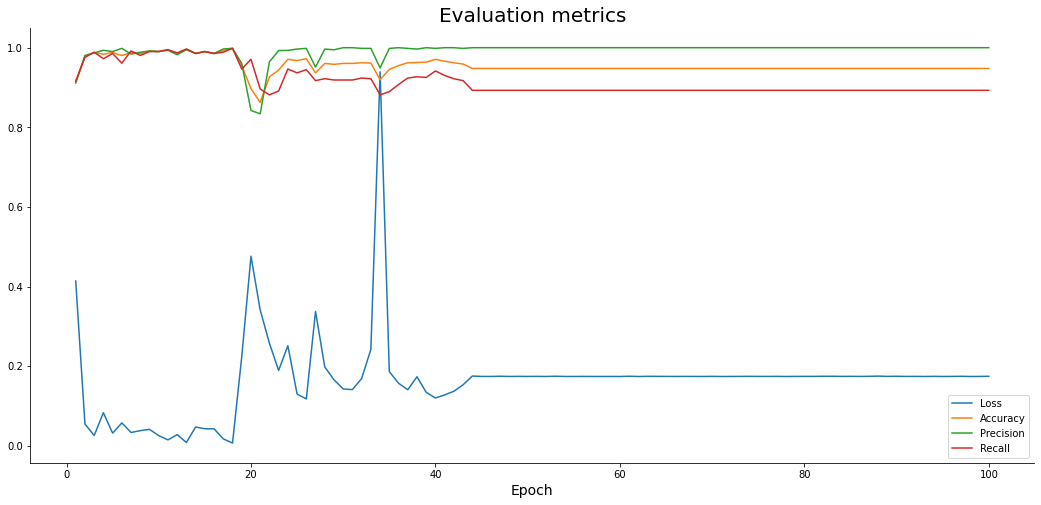

In [96]:
plt.plot(
    np.arange(1, 101), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

Fazendo previsões

In [97]:
predictions = model.predict(X_test_scaled)

27/27 [==============================] - 0s 3ms/step


In [98]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.97
Precision: 1.00
Recall: 0.94
